# Day 5, Exercise 1 - Pandas and plotting

### There are 2 parts to this exercise, with answers listed under each part
1. The orange tree data
2. The VCF data

There are various ways to write the code for these tasks. Here, we present one solution in the answers, but if you have written a different one, that's perfectly fine. Just ensure that you test your code to confirm that it performs as expected.

<hr style="border: 2px solid #000080;">

## 1. The orange tree data

### Description:
The purpose of this exercise is to use a small tabular dataset to get familiar with basic concepts and operations of the Pandas library, as well as its plotting capabilities.

### Tasks:

  - Load the file `Orange_1.tsv` into Pandas dataframe
  - Print the height column
  - Print the data for the tree at age 2
  - Find the maximum circumference
  - How old was the tree at that time?
  - Plot the circumference in relation to the height
  
___

### The answers

In [2]:
# 1. Load the file `Orange_1.tsv` into Pandas dataframe
import pandas as pd
df = pd.read_csv('../../downloads/Orange_1.tsv', sep='\t')
df

,age,circumference,height
0,1,2,30
1,2,3,35
2,3,5,40
3,4,10,50


In [18]:
# 2. Print the height column
df['height']

0    30
1    35
2    40
3    50
Name: height, dtype: int64

In [19]:
# 3. Print the data for the tree at age 2
df[df.age == 2]

,age,circumference,height
1,2,3,35


In [24]:
# 4. Find the maximum circumference
max_c = df.circumference.max()
max_c

10

In [26]:
# 5. How old was the tree at that time?
df[df.circumference == max_c].age.iloc[0]

4

<Axes: >

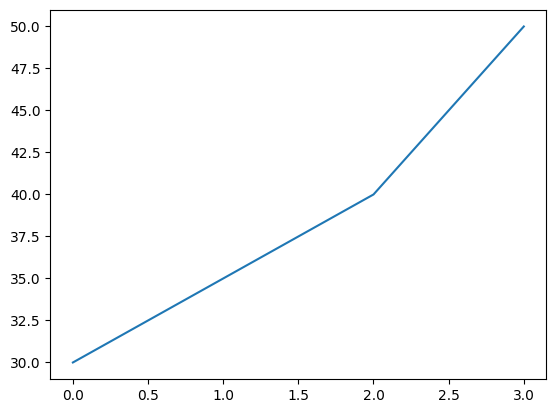

In [23]:
# Plot the circumference in relation to the height
df.height.plot(x='circumference', y='height')

<hr style="border: 2px solid #000080;">

## 2.  The VCF data

Read the VCF file used in the lecture into a Pandas dataframe

- Plot the histogram of Allele Count for all chromosomes

- Plot the average Allele Count for against chromosomes
  Is there any systematic differneces 


    

There are plenty of other tutorials online, here are a few:
    

-  https://www.youtube.com/playlist?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL- A nice youtube tutorial series

- https://swcarpentry.github.io/python-intermediate-mosquitoes/01-intro-python.html

- https://www.tutorialspoint.com/python_pandas/index.htm

- https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm (The visualization section of the tutorial above)

## Solution 1